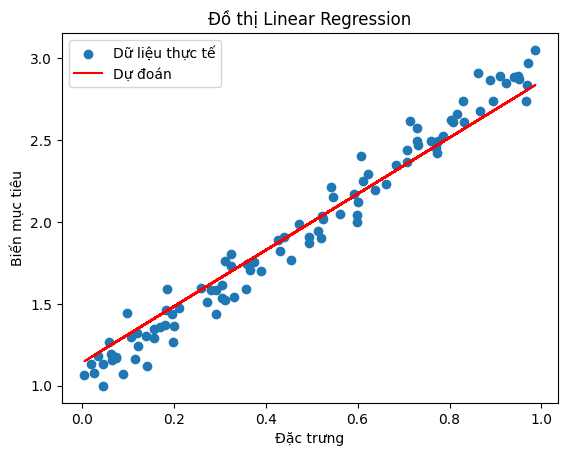

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu giả tạo
np.random.seed(42)
X = np.random.rand(100, 1)  # Đặc trưng
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)  # Biến mục tiêu

# Chuyển dữ liệu NumPy thành tensors PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Định nghĩa mô hình hồi quy tuyến tính
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # Một đặc trưng đầu vào và một đầu ra

    def forward(self, x):
        return self.linear(x)

# Khởi tạo mô hình
model = LinearRegression()

# Định nghĩa hàm mất mát và bộ tối ưu hóa
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Huấn luyện mô hình
num_epochs = 1000
for epoch in range(num_epochs):
    # Lan truyền tiến
    outputs = model(X)
    loss = criterion(outputs, y)

    # Lan truyền ngược và cập nhật trọng số
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Trực quan hóa dự đoán
predicted = model(X).detach().numpy()
plt.scatter(X.numpy(), y.numpy(), label='Dữ liệu thực tế')
plt.plot(X.numpy(), predicted, 'r', label='Dự đoán')
plt.legend()
plt.xlabel('Đặc trưng')
plt.ylabel('Biến mục tiêu')
plt.title('Đồ thị Linear Regression')
plt.show()